# Collinearity
### For INM702 - regression

When discussing the regression model, we will use notation from "Applied Regression Analysis", Springer. (XXXX - need to check I use correct citation)

The linear model can be written as

$$\boldsymbol{Y} = \boldsymbol{X\beta} + \boldsymbol{\epsilon}$$

Where 
* $\boldsymbol{Y}$ has size $(N, 1)$, where $N$ is the sample size,
* $\boldsymbol{X}$ is of size $(n, p')$ and has a column of 1s as the first column. There are $p = p'-1$ independent random variables, each sampled $N$ times. 
* $\boldsymbol{\beta}$ is of size $(p', 1)$ and consists of $\beta_0$, the intercept, and $(\beta_1,... ,\beta_p)$, the coefficients corresponding to the random variables.
* $\boldsymbol{\epsilon}$ is the random noise and consists of independent identically distributed normal variables with mean 0. 

When finding best estimate for $\boldsymbol{\beta}$, one of the assumptions of the model is that the features are independent. We investigate the implications of colinearities in the features, and what we can do to mitigate them. 

In [2]:
import sys
sys.path.insert(0, '../src')

from colinearity import ColinearX
import numpy as np
import matplotlib.pyplot as plt 
# from sklearn.linear_model import LinearRegression

First run a regression for $\boldsymbol{X}$ consisting of 4 independent random variables, with two being uniform $[0,1]$ and two being normal with means 0.5 and -1 and variance 1. $\boldsymbol{\beta}=(1,4,1,1,1)$

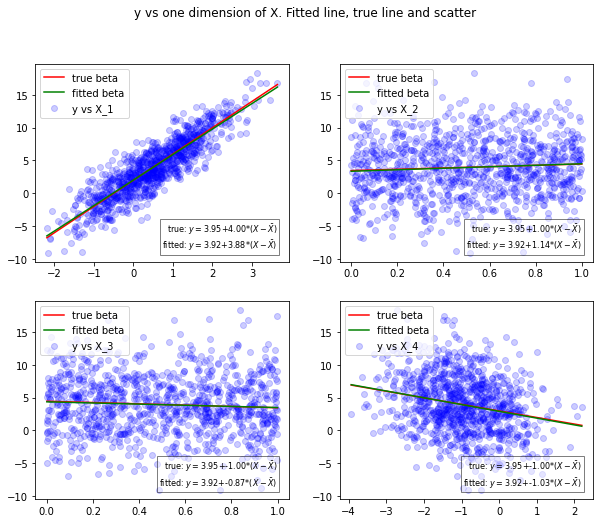

R^2 = 0.83


In [8]:
reg = ColinearX(N=1000, beta=(1,4,1,-1,-1), noise_var=3)
reg.generate_X(co_type='pairwise correlation',mean=(0.5,0,0,-1),
   cov=0)
reg.to_uniform(i_list=[2,3])
reg.generate_y()
reg.train_test_split()
reg.fit()
reg.plot2D()
print('R^2 = {:.2f}'.format(reg.score))